# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [73]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [74]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [75]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [76]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')


In [77]:
# Find the table
mars_temperature_data = html_soup.find('table', class_='table')
mars_temperature_data

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [78]:
# Create an empty list
column_heading_data = []

# Loop through the scraped data to create a list of rows
# Extract all columns of headings
column_headings = html_soup.find_all('th')
# Loop through and get column headers

for column_header in column_headings:
    heading = column_header.text.upper()  # Convert to uppercase
    column_heading_data.append(heading)
# Print the result
print(column_heading_data)

# Extract all rows of data
mars_temperature_data = []
rows = html_soup.find_all('tr')

# Loop through the rows
for row in rows:
    # Loop through to get each row's data
    row_data = row.find_all('td')
    if row_data:
        row_data = [data.text.strip() for data in row_data]
    mars_temperature_data.append(row_data)

# Check if the first row is empty and remove it if necessary
if mars_temperature_data[0] == []:
    mars_temperature_data = mars_temperature_data[1:]

# Print the result
print(mars_temperature_data)

['ID', 'TERRESTRIAL_DATE', 'SOL', 'LS', 'MONTH', 'MIN_TEMP', 'PRESSURE']
[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '

In [79]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temperature_data_df = pd.DataFrame(mars_temperature_data)
mars_temperature_df = mars_temperature_data_df

# Change DataFrame column headers
mars_temperature_df.columns = column_heading_data

# Print the updated DataFrame
mars_temperature_df

,ID,TERRESTRIAL_DATE,SOL,LS,MONTH,MIN_TEMP,PRESSURE
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [80]:
# Confirm DataFrame was created successfully
print(mars_temperature_df.shape)

(1867, 7)


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [81]:
# Examine data type of each column
mars_temperature_df.dtypes

ID                  object
TERRESTRIAL_DATE    object
SOL                 object
LS                  object
MONTH               object
MIN_TEMP            object
PRESSURE            object
dtype: object

In [82]:
# Change data types for data analysis
mars_temperature_df['TERRESTRIAL_DATE'] = pd.to_datetime(mars_temperature_df['TERRESTRIAL_DATE'])
mars_temperature_df['SOL'] = mars_temperature_df['SOL'].astype(int)
mars_temperature_df['LS'] = mars_temperature_df['LS'].astype(int)
mars_temperature_df['MONTH'] = mars_temperature_df['MONTH'].astype(int)
mars_temperature_df['MIN_TEMP'] = mars_temperature_df['MIN_TEMP'].astype(float)
mars_temperature_df['PRESSURE'] = mars_temperature_df['PRESSURE'].astype(float)



In [83]:
# Confirm type changes were successful by examining data types again
mars_temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1867 non-null   object        
 1   TERRESTRIAL_DATE  1867 non-null   datetime64[ns]
 2   SOL               1867 non-null   int64         
 3   LS                1867 non-null   int64         
 4   MONTH             1867 non-null   int64         
 5   MIN_TEMP          1867 non-null   float64       
 6   PRESSURE          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [84]:
# 1. How many months are there on Mars?
number_of_months = len(mars_temperature_df["MONTH"].unique())
print(f"There are {number_of_months} months of Mars")


There are 12 months of Mars


In [85]:
# 2. How many Martian days' worth of data are there?
first_day_data = mars_temperature_df['SOL'].min()
last_day_data = mars_temperature_df['SOL'].max()
overall_days = len(mars_temperature_df['SOL'].unique())

print(f"There are {overall_days} Martian days of data, the dataset for these Martian days commences on the {first_day_data} to the {last_day_data}. Please note that on some Martian days, data might be obtained multiple times.")


There are 1867 Martian days of data, the dataset for these Martian days commences on the 10 to the 1977. Please note that on some Martian days, data might be obtained multiple times.


In [86]:
# 3. What is the average low temperature by month?
avg_temperature = mars_temperature_df.groupby("MONTH")["MIN_TEMP"].mean()

# Create a DataFrame from the average temperature
avg_temperature_df = pd.DataFrame(avg_temperature)

# Rename the "MIN_TEMP" column to "Average Temperature"
avg_temperature_df = avg_temperature_df.rename(columns={"MIN_TEMP": "AVERAGE TEMPERATURE"})

# Print the updated DataFrame
avg_temperature_df


,AVERAGE TEMPERATURE
MONTH,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


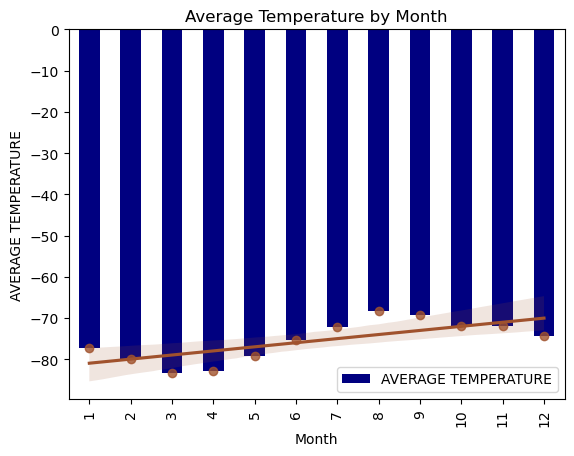

In [87]:
# Plot the average temperature by month
ax = avg_temperature_df.plot(kind="bar", color="navy")

# Add labels and title to the plot
ax.set_xlabel("Month")
ax.set_ylabel("Average Temperature")
ax.set_title("Average Temperature by Month")

# Fit a linear regression model
x = np.arange(len(avg_temperature_df))
y = avg_temperature_df["AVERAGE TEMPERATURE"]
sns.regplot(x=x, y=y, ax=ax, color="sienna")

# Display the plot
plt.show()


In [88]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = avg_temperature_df["AVERAGE TEMPERATURE"].min()
coldest_month = avg_temperature_df.loc[avg_temperature_df["AVERAGE TEMPERATURE"]==coldest_temp]
print(coldest_month)

hottest_temp = avg_temperature_df["AVERAGE TEMPERATURE"].max()
hottest_month = avg_temperature_df.loc[avg_temperature_df["AVERAGE TEMPERATURE"]==hottest_temp]
print(hottest_month)

       AVERAGE TEMPERATURE
MONTH                     
3               -83.307292
       AVERAGE TEMPERATURE
MONTH                     
8               -68.382979


In [89]:
#Print the answer to the question of what is the hottest and coldest month on Mars in Curiosity's location.
print(f"In Curiosity's location the coldest month was 3, with the avearage temperature of {coldest_temp} degrees celsius. While the hottest month was 8, with an average temperature of {hottest_temp} degrees celsius.")

In Curiosity's location the coldest month was 3, with the avearage temperature of -83.30729166666667 degrees celsius. While the hottest month was 8, with an average temperature of -68.38297872340425 degrees celsius.


In [90]:
# 4. Average pressure by Martian month
avg_pressure = mars_temperature_df.groupby("MONTH")["PRESSURE"].mean()

# Create a DataFrame from the average pressure
avg_pressure_df = pd.DataFrame(avg_pressure)

# Rename the "MIN_TEMP" column to "Average Temperature"
avg_pressure_df = avg_pressure_df.rename(columns={"PRESSURE": "AVERAGE PRESSURE"})

# Print the updated DataFrame
avg_pressure_df

,AVERAGE PRESSURE
MONTH,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


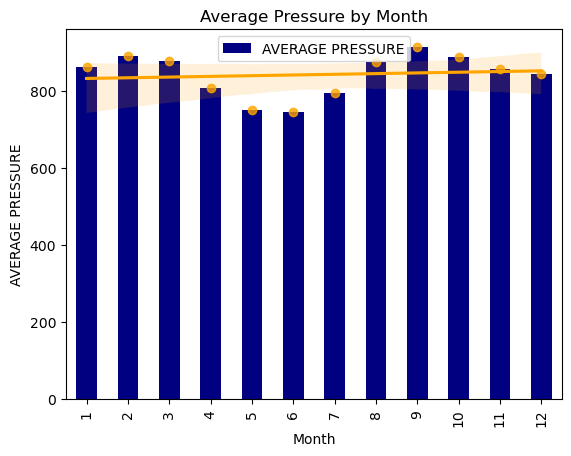

In [91]:
# Plot the average pressure by month
ax = avg_pressure_df.plot(kind="bar", color="navy")

# Add labels and title to the plot
ax.set_xlabel("Month")
ax.set_ylabel("Average Pressure")
ax.set_title("Average Pressure by Month")

# Fit a linear regression line
x = np.arange(len(avg_pressure_df))
y = avg_pressure_df["AVERAGE PRESSURE"]
sns.regplot(x=x, y=y, ax=ax, color="orange")

# Display the plot
plt.show()

In [92]:
# Identify the coldest and hottest months in Curiosity's location
lowest_pressure = avg_pressure_df["AVERAGE PRESSURE"].min()
lowest_pressure_month = avg_pressure_df.loc[avg_pressure_df["AVERAGE PRESSURE"]==lowest_pressure]
print(lowest_pressure_month)

highest_pressure = avg_pressure_df["AVERAGE PRESSURE"].max()
highest_pressure_month = avg_pressure_df.loc[avg_pressure_df["AVERAGE PRESSURE"]==highest_pressure]
print(highest_pressure_month)

       AVERAGE PRESSURE
MONTH                  
6            745.054422
       AVERAGE PRESSURE
MONTH                  
9             913.30597


In [93]:

#Print the answer to the question of what is the hottest and coldest month on Mars in Curiosity's location.
print(f"In Curiosity's location the month with the lowest pressure was month 6, with the avearage pressure of {lowest_pressure}. While the month with the highest pressure was month 9, with an average pressure of {highest_pressure}.")

In Curiosity's location the month with the lowest pressure was month 6, with the avearage pressure of 745.0544217687075. While the month with the highest pressure was month 9, with an average pressure of 913.3059701492538.


In [94]:
mars_temperature_df

,ID,TERRESTRIAL_DATE,SOL,LS,MONTH,MIN_TEMP,PRESSURE
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


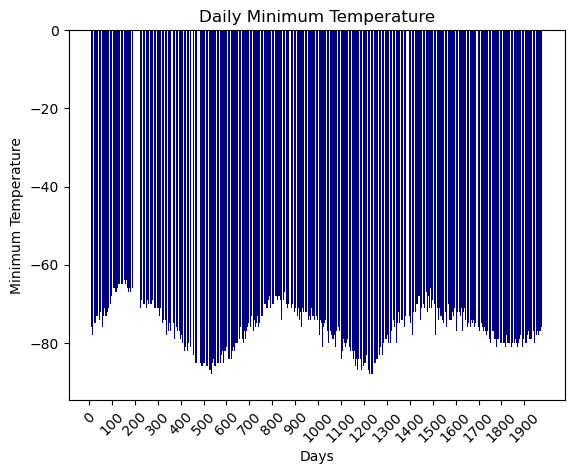

In [126]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the minimum temperature vs Martian Days
plt.bar(mars_temperature_df['SOL'], mars_temperature_df['MIN_TEMP'], color="navy")

# Create labels for the x and y axes
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")

# Set x-axis ticks every 50 days
plt.xticks(np.arange(0, max(mars_temperature_df['SOL']), 100), rotation=45)

# Create title
plt.title('Daily Minimum Temperature')

# Show the graph
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [110]:
# Write the data to a CSV
mars_temperature_df.to_csv('Mars_Data_Table.csv',index=False)

In [111]:
browser.quit()